---
<center>

  # **Tarea 03**

**Realizado Por:**

   Samuel Huertas Rojas

---
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.integrate import quad

import matplotlib.animation as animation
from IPython.display import HTML



In [2]:
def animar_esquema(
        numero_pasos: int, 
        matriz_video: np.ndarray,
        filename: str,
):
    """
    Genera y guarda una animación de la evolución de V usando esquema_prog_prog.

    Parámetros
    ----------
    numero_pasos : int
        Número de pasos de tiempo.
    matriz_video : np.ndarray
        Matriz que contiene las soluciones en cada paso de tiempo.
    filename : str
        Nombre del archivo de salida (GIF).
    """
    # Matriz para guardar los resultados
    V = matriz_video

    # --- Animación ---
    fig, ax = plt.subplots()
    (line,) = ax.plot(V[0, :], lw=2)
    ax.set_ylim(np.min(V), np.max(V))
    ax.grid(True)

    def update(frame):
        line.set_ydata(V[frame, :])
        return (line,)

    ani = FuncAnimation(fig, update, frames=range(numero_pasos + 1), interval=100, blit=True)

    # Guardar como GIF
    gif_name = filename + ".gif"
    ani.save(gif_name, writer=PillowWriter(fps=10))
    plt.close(fig)
    print(f"✅ Animación guardada en {filename}")

    return ani

# 1.

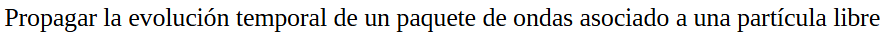

In [3]:
# Constante hbar
#hbar = 1.0545718e-34  # J·s
hbar = 1

# Definición de los parámetros del paquete de ondas
p0 = 8
x0 = -18
sigma = 0.5

# Masa de la particula
m = 1

# Numero de pasos de tiempo y de espacio
N = 200

# Variable espacial
longirud_intervalo = 20
x_prima = np.linspace(-longirud_intervalo, longirud_intervalo, N)

Tenemos que la E.D para una particula libre está dada por:

<center>

$\frac{\partial^2 \psi}{\partial x^2} + \frac{2m}{\hbar^2} E = 0 $

</center>

La evolución temporal va a estar dada por: 

<center>

$ \ket{\psi(t)} = e^{-i\hat{H}(t-t_0)/\hbar} \ket{\psi_0}$

</center>

Desarrollando el Hamiltoniano en sus autofunciones $\hat{H} \ket{\varphi} = E_n \ket{\varphi_n}  $

Con esto tenemos que el operador es:

<center>

$u(t,t_0) = \sum_n \ket{\varphi_n}\bra{\varphi_n} e^{-iE_n (t-t_0)/\hbar}   $

</center>

Donde $p= \pm \sqrt{2mE}$. Encontrando las autofunciones del momento se puede calcular la propagación del paquete de ondas, posteriormente se multiplica por la condición inicial $\psi(x',0)$ y se integra con respecto a $x'$

Para una particula libre el propagador va a ser:

<center>

$u(x,t,x',t') = (\frac{m}{2 \pi \hbar it})^{1/2} e^{im(x-x')^2/2\hbar(t-t_0)} $

</center>

En forma general el propagador queda de la forma:

<center>

$u(x,t,x',t') = \int_{-\infty}^{\infty} \braket{x|\varphi}\braket{\varphi|x} e^{-iE_n(t-t_0)/\hbar} d\varphi $

</center>

En el caso del momento:

<center>

$u(x,t,x',t') = \int_{-\infty}^{\infty} \braket{x|p}\braket{p|x} e^{-ip^2(t-t_0)/2m\hbar} dp$

</center>


Lo primero que hay que realizar es la definición del paquete de ondas. Se va a definir el paquete de ondas como una gaussiana, la cual va a tener la siguiente expresión matemática:

Paquete de ondas: $A e^{-\frac{(x- \mu)^{2}}{2\sigma^2}}$

En donde: 

* $A$: es el valor más alto del paquete de ondas.
* $\mu$: posición central del paquete de ondas, donde se ubica el centro del paquete de ondas.
* $\sigma$: que tan ancho es el paquete de ondas. 

Pauqete de ondas que este localizado en $x_0$ con un momento inicial $p_0$, la expresión matemática va a estar dada por:

<center>

$\frac{1}{\sqrt{2 \pi}\sigma} e^{-\frac{(x-x_0)^2}{2\sigma^2}} e^{i p_0x/\hbar}   $

</center>

In [4]:
def propagador(x, t, x_prima, t_prima, m, hbar):
    """
    Calcula el propagador cuántico para una partícula libre.
    
    Parámetros:
    -----------
    x : float
        Posición final
    t : float
        Tiempo final
    x_prima : float
        Posición inicial
    t_prima : float
        Tiempo inicial (t_0)
    m : float
        Masa de la partícula
    hbar : float
        Constante de Planck reducida (ℏ)
    
    Retorna:
    --------
    complex : Valor del propagador u(x, t, x', t')
    """
    
    # Diferencia temporal
    dt = t - t_prima
    
    if dt <= 0:
        raise ValueError("t debe ser mayor que t_prima")
    
    # Diferencia espacial
    dx = x - x_prima
    
    # Factor de prefactor
    prefactor = (m / (2 * np.pi * hbar * 1j * dt))**(1/2)
    
    # Exponente complejo
    exponente = 1j * m * dx**2 / (2 * hbar * dt)
    
    # Propagador completo
    u = prefactor * np.exp(exponente)
    
    return u


def psi_inicial(x_prima, x0=0, sigma=1, k0=0):
    """
    Paquete de ondas gaussiano inicial.
    
    Parámetros:
    -----------
    x_prima : float o array
        Posición
    x0 : float
        Posición central del paquete
    sigma : float
        Ancho del paquete
    k0 : float
        Momento inicial (en unidades de hbar)
    
    Retorna:
    --------
    complex : ψ(x', 0)
    """
    normalizacion = 1/(np.sqrt(2 * np.pi) * sigma)
    gaussian = np.exp(-(x_prima - x0)**2 / (2 * sigma**2))
    fase = np.exp(1j * k0 * x_prima/hbar)
    
    return normalizacion * gaussian * fase

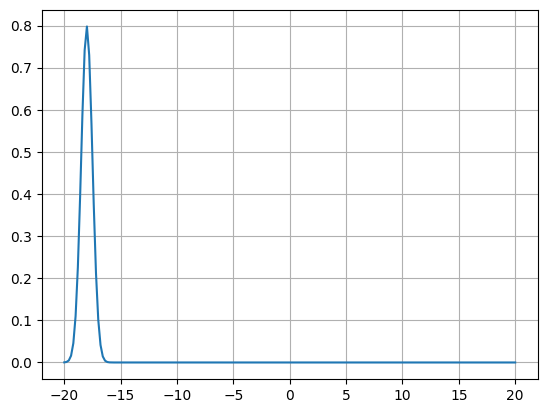

In [5]:
paquete_onda = psi_inicial(x_prima, x0,  sigma, p0)

plt.plot(x_prima, np.abs(paquete_onda))
plt.grid()
plt.show()

Una vez definido el paquete de ondas y el propagador lo único que falta por realiar es la siguiente integral con respecto a $x'$

<center>

$ \psi(x,t) = \int_{-\infty}^{\infty} u(x,t,x',0)\psi(x',0) dx' $

</center>

In [6]:
def evolucion_temporal(x, t, m, hbar, x0=0, sigma=1, k0=0, x_limits=(-50, 50)):
    """
    Calcula ψ(x, t) usando la integral del propagador.
    
    ψ(x, t) = ∫ u(x, t, x', 0) ψ(x', 0) dx'
    
    Parámetros:
    -----------
    x : float
        Posición donde evaluar ψ(x, t)
    t : float
        Tiempo
    m : float
        Masa de la partícula
    hbar : float
        Constante de Planck reducida
    x0 : float
        Posición central inicial del paquete
    sigma : float
        Ancho inicial del paquete
    k0 : float
        Momento inicial
    x_limits : tuple
        Límites de integración
    
    Retorna:
    --------
    complex : ψ(x, t)
    """
    
    def integrando_real(x_prima):
        prop = propagador(x, t, x_prima, 0, m, hbar)
        psi_0 = psi_inicial(x_prima, x0, sigma, k0)
        resultado = prop * psi_0
        return np.real(resultado)
    
    def integrando_imag(x_prima):
        prop = propagador(x, t, x_prima, 0, m, hbar)
        psi_0 = psi_inicial(x_prima, x0, sigma, k0)
        resultado = prop * psi_0
        return np.imag(resultado)
    
    # Integración numérica de partes real e imaginaria
    real_part, _ = quad(integrando_real, x_limits[0], x_limits[1], limit=100)
    imag_part, _ = quad(integrando_imag, x_limits[0], x_limits[1], limit=100)
    
    return real_part + 1j * imag_part

In [7]:
x = np.linspace(-longirud_intervalo, 4*longirud_intervalo, N)
tiempo = np.linspace(1, 8, N)

# Arreglo para guardar la evolución
evolucion = np.zeros((len(tiempo), len(x)))

In [8]:
# for i, t in enumerate(tiempo):
#     pos = i
#     # Calcular ψ(x, t) para cada posición
#     psi_t = []
#     for i in x:
#         if t == 0:
#             psi = psi_inicial(i, x0, sigma, p0)
#         else:
#             psi = evolucion_temporal(i, t, m, hbar, x0, sigma, p0)
#         psi_t.append(psi)
        
#     psi_t = np.array(psi_t)
#     densidad_prob = np.abs(psi_t)**2
#     evolucion[pos, :] = densidad_prob
    

In [9]:
# Animar y guardar el resultado
# animar_esquema(len(tiempo)-1, evolucion, "evolucion_paquete_onda_libre")

# 2.

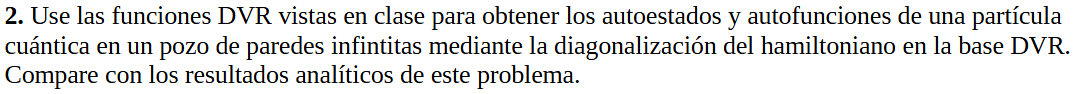

Las funciones DVR propuestas son: 

<center>

$f_n(R) = \frac{2}{\sqrt{L(N_f +1)}} \sum_{k=1}^{N_f} \sin(\frac{ k \pi (R - R_0)}{L}) \sin(\frac{k n \pi}{N_f + 1}) $

</center>

Donde: 

* $N_f$ es el numero de funciones DVR
* $R_n = \frac{nL}{N_f +1} + R_0$, es el mallado a utilizar de la función DVR
* $L$ es el tamaño del intervalo.


Con lo que la función $\psi(R) = \sum_n c_n f_n(R)$

Tenemos que para una partícula cuántica en un pozo de paredes infinitas:

* $E_n = \frac{n^2 \pi^2 \hbar^2}{2 m L^2} $
* $ \varphi_n = \sqrt{\frac{2}{L}} \sin(n \pi x / L)  $

Una propiedad impontante de las funciones DVR es que, al tener una función y hacer la proyección en las funciones DVR se van a obtener unos coeficientes y estos coeficientes van a ser la función:

<center>

$\braket{f_n(R) | \phi(R)} = \sqrt{\frac{L}{N_f + 1}} \phi(R_n) = c_n$

</center>

In [10]:
r0 = 0                          # Valor inicial de r
rmax = 20                       # Valor máximo de r
L = rmax - r0                   # Longitud del intervalo
Ndvr = 150                      # Número de funciones a utilizar
mu = 1                          # Masa reducida (en unidades atómicas)

#R = np.linspace(r0, rmax, Ndvr)

n = 10

# Malla de puntos de la función DVR
def generar_puntos(L, Nf, P0):
    """
    Genera un arreglo de puntos según la fórmula: Pn = nL/(Nf+1) + P0
    
    Parámetros:
    -----------
    L : float
        Longitud total o parámetro L
    Nf : int
        Número final de puntos (n va de 1 a Nf)
    P0 : float
        Punto inicial o valor base
    
    Retorna:
    --------
    numpy.array : Arreglo con los puntos calculados
    """
    n = np.arange(0, Nf)  # Crea n = 1, 2, 3, ..., Nf
    Pn = (n * L) / (Nf + 1) + P0
    return Pn

Rn = generar_puntos(
    L= L,
    Nf= Ndvr,
    P0= r0
)

In [11]:
# Definición de las funciones DVR
def funcion_dvr(
        R, 
        Nf, 
        L, 
        R0, 
        n
):
    """
    Calcula la función fn(R) según la fórmula DVR.
    
    Parámetros:
    -----------
    R : float o array
        Valor(es) de la coordenada R
    Nf : int
        Número de puntos de la cuadrícula (grid points)
    L : float
        Longitud del dominio
    R0 : float
        Punto inicial del dominio
    n : int
        Número de la función DVR
        
    Retorna:
    --------
    float o array
        Valor de la función fn(R)
    """
    # Factor de normalización
    factor = 2 / np.sqrt(L * (Nf + 1))
    
    # Suma sobre k desde 1 hasta Nf
    suma = 0
    for k in range(0, Nf + 1):
        # Primer término: sin(kπ(R-R0)/L)
        primer_sin = np.sin(k * np.pi * (R - R0) / L)
        
        # Segundo término: sin(kπn/(Nf+1))
        segundo_sin = np.sin(k * np.pi * n / (Nf + 1))
        
        suma += primer_sin * segundo_sin
    
    return factor * suma

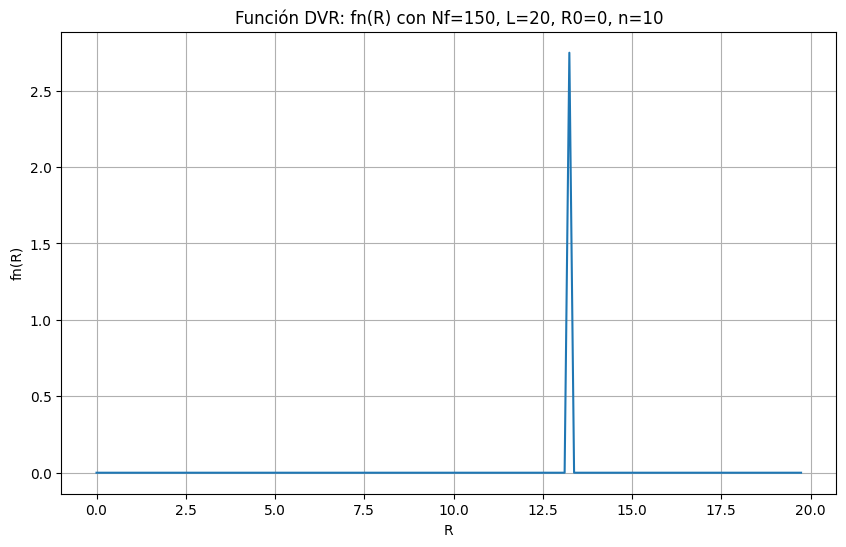

In [12]:
resultado = funcion_dvr(Rn, Ndvr, L, r0, 100)

# Graficar (opcional)
plt.figure(figsize=(10, 6))
plt.plot(Rn, resultado)
plt.xlabel('R')
plt.ylabel('fn(R)')
plt.title(f'Función DVR: fn(R) con Nf={Ndvr}, L={L}, R0={r0}, n={n}')
plt.grid(True)
plt.show()

Tenemos que las funcionees DVR cumplen con:


<center>

$\int_{-\infty}^{\infty} f_i \frac{d^2 f_j}{dR^2} dR = \frac{2 \pi^2}{(N_f + 1) L^2} \sum_{k=1}^{N_f} k^2 \sin(\frac{i k \pi}{N_f +1})\sin(\frac{j k \pi}{N_f +1}) $

</center>

Con la anterior propiedad de las funciones DVR se puede calcular la matriz del Hamiltoniano como: 

<center>

$\braket{f_i | \hat{H} | f_j}  = -\frac{\hbar^2}{2m} \braket{f_i | \frac{d^2 f_j}{dx^2}} + \delta_{ij} V(R_i)$

</center>

### Resultados analíticos del pozo de paredes infinitas

<center>

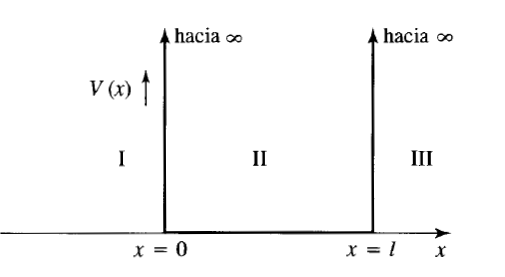

</center>

De la solución analítica para el pozo de paredes infinitas obtenemos que los valores permitidos para la energía van a ser: 

<center>

$E_n = \frac{n^2 \pi^2 \hbar^2}{2mL^2}$ , donde $n=1,2,3, \dotso$

</center>

Y con autofunciones: 

<center>

$\varphi_n = \sqrt{\frac{2}{L}} \sin(\frac{n \pi x}{L})$

</center>

Autovalor E_1 = 0.01
Autovalor E_2 = 0.05
Autovalor E_3 = 0.11
Autovalor E_4 = 0.20


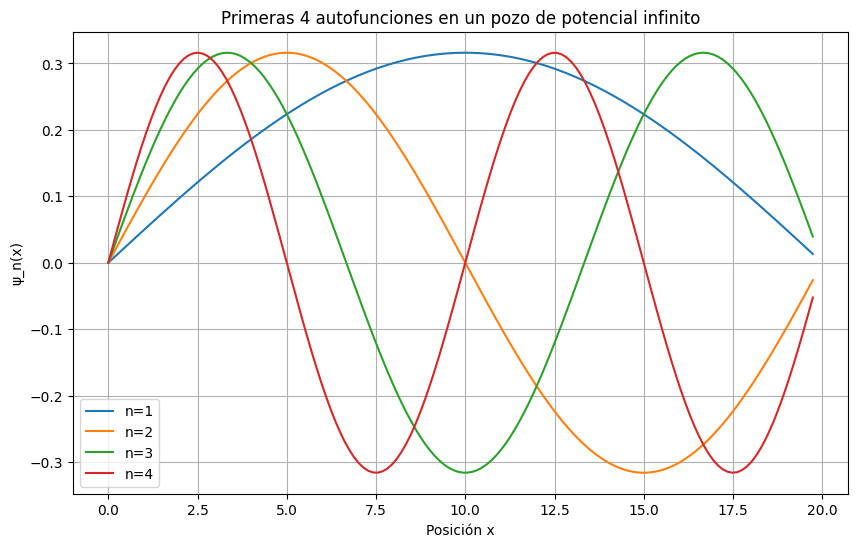

In [13]:
# Definición de las autofunciones y autovalores de una particula en un pozo con paredes infinitas
def autovalores_pozo_infinito(
        L, # Ancho del pozo 
        n, # Número cuantico (n=1,2,3,...)
):
    En = (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)

    return En


def autofunciones_pozo_infinito(
        x, # Posición
        L, # Ancho del pozo
        n, # Número cuantico (n=1,2,3,...)
):
    if x < 0 or x > L:
        return 0
    else:
        psi_n = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
        return psi_n

plt.figure(figsize=(10, 6))
for n in range(1, 5):
    psi_n = [autofunciones_pozo_infinito(xi, L, n) for xi in Rn] 
    plt.plot(Rn, psi_n, label=f'n={n}')
    En = autovalores_pozo_infinito(L, n)
    print(f'Autovalor E_{n} = {En:.2f}')
plt.title('Primeras 4 autofunciones en un pozo de potencial infinito')
plt.xlabel('Posición x')
plt.ylabel('ψ_n(x)')
plt.legend()
plt.grid()
plt.show()
    

Autovalor E_1 = 0.01 unidades de energía
Autovalor E_2 = 0.05 unidades de energía
Autovalor E_3 = 0.11 unidades de energía


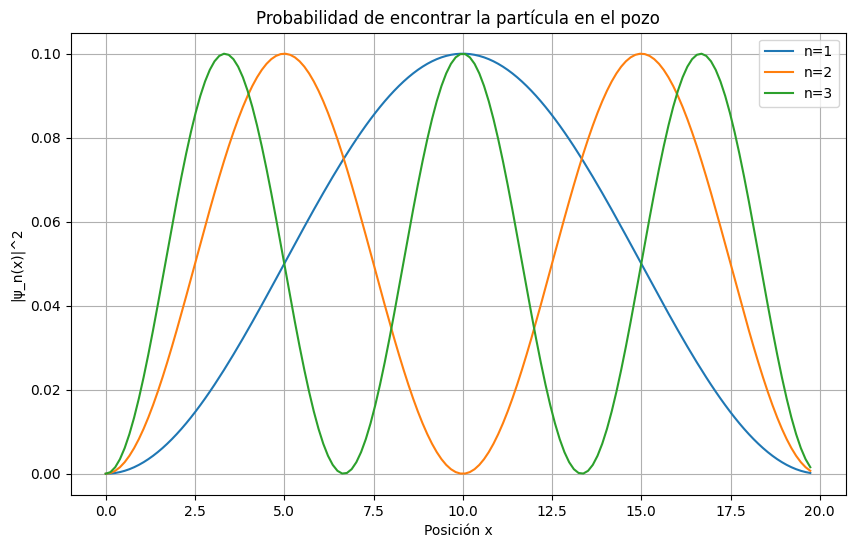

In [14]:
# Grafica la probabilidad de encontrar la particula en el pozo
plt.figure(figsize=(10, 6))
for n in range(1, 4):
    abs_psi_n = [autofunciones_pozo_infinito(xi, L, n) * autofunciones_pozo_infinito(xi, L, n) for xi in Rn]
    plt.plot(Rn, abs_psi_n, label=f'n={n}')
    En = autovalores_pozo_infinito(L, n)
    print(f'Autovalor E_{n} = {En:.2f} unidades de energía')
plt.title('Probabilidad de encontrar la partícula en el pozo')
plt.xlabel('Posición x')
plt.ylabel('|ψ_n(x)|^2')
plt.legend()
plt.grid()
plt.show()

### Calculo de termino cinetico del Hamiltoniano

In [15]:
# Arreglo del Hamiltoniano
H = np.zeros((Ndvr, Ndvr))

# Termino cinetico del Hamiltoniano en DVR
def termino_cinetico(i, j):
    # Constante del termino cinetico del Hamiltoniano en DVR
    const_cinetico = (np.pi**2) / ((Ndvr + 1) * L**2)
    # Suma sobre k desde 1 hasta Nf
    suma = 0
    for k in range(0, Ndvr + 1):
        # Primer término: sin(kπ(R-R0)/L)
        primer_sin = k**2 * np.sin((k * np.pi * i) / (Ndvr + 1))
        
        # Segundo término: sin(kπn/(Nf+1))
        segundo_sin = np.sin(k * np.pi * j / (Ndvr + 1))
        
        suma += primer_sin * segundo_sin
    
    return const_cinetico * suma

# Calculo de termino cinetico del Hamiltoniano
for i in range(Ndvr):
    for j in range(i, Ndvr):
        H[i, j] = termino_cinetico(i+1, j+1)

        # Ya que el Hamiltoniano es un operador hermitico, este va a ser simetrica
        H[j,i] = H[i, j]
    

In [16]:
autovalores_H, autovectores_H = np.linalg.eigh(H, UPLO="L")

print("Comparación de los autovalores del Hamiltoniano con los valores esperados:")
print("------------------ \t Valor analitico \t Valor aproximado (DVR) \t % Error")
for n in range(1, 20):
    En = autovalores_pozo_infinito(L, n)
    error_aproximacion = np.abs((En - autovalores_H[n-1])/ En) * 100

    print(f"Energia estado ({n}) \t {En:.4f} \t\t {autovalores_H[n-1]:.4f} \t\t\t {error_aproximacion:.4f}%")



Comparación de los autovalores del Hamiltoniano con los valores esperados:
------------------ 	 Valor analitico 	 Valor aproximado (DVR) 	 % Error
Energia estado (1) 	 0.0123 		 0.0123 			 0.0000%
Energia estado (2) 	 0.0493 		 0.0493 			 0.0000%
Energia estado (3) 	 0.1110 		 0.1110 			 0.0000%
Energia estado (4) 	 0.1974 		 0.1974 			 0.0000%
Energia estado (5) 	 0.3084 		 0.3084 			 0.0000%
Energia estado (6) 	 0.4441 		 0.4441 			 0.0000%
Energia estado (7) 	 0.6045 		 0.6045 			 0.0000%
Energia estado (8) 	 0.7896 		 0.7896 			 0.0000%
Energia estado (9) 	 0.9993 		 0.9993 			 0.0000%
Energia estado (10) 	 1.2337 		 1.2337 			 0.0000%
Energia estado (11) 	 1.4928 		 1.4928 			 0.0000%
Energia estado (12) 	 1.7765 		 1.7765 			 0.0000%
Energia estado (13) 	 2.0850 		 2.0850 			 0.0000%
Energia estado (14) 	 2.4181 		 2.4181 			 0.0000%
Energia estado (15) 	 2.7758 		 2.7758 			 0.0000%
Energia estado (16) 	 3.1583 		 3.1583 			 0.0000%
Energia estado (17) 	 3.5654 		 3.5654 			 0.0

### Dibujo de las autofunciones

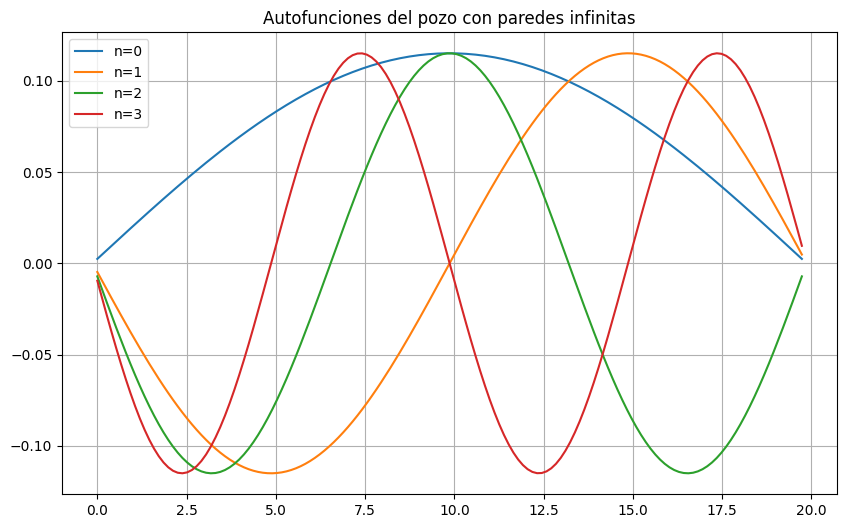

In [17]:
plt.figure(figsize=(10, 6))

for i in range(0, 4):
    plt.plot(Rn,  autovectores_H[:,i], label=f'n={i}')
    #plt.plot(Rn,  autovectores_H[:,i] * autovectores_H[:,i], label=f'n={i}')
plt.title("Autofunciones del pozo con paredes infinitas")
plt.legend()
plt.grid()
plt.show()

# 3.

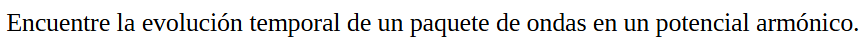

Para el caso del oscilador se puede utilizar las funciones DVR, con lo que solo toca realizar el cambio en la función del potencial. Esto sería:

<center>

$\braket{f_i | \hat{H} | f_j}  = -\frac{\hbar^2}{2m} \braket{f_i | \frac{d^2 f_j}{dx^2}} + \delta_{ij} V(R_i)$

</center>

En donde la fucnión para $V(R_i)$ va a estar dada por:

<center>

$V(R_i) = \frac{1}{2}(R - \frac{L}{2})^2$

</center>

Con lo que la matriz del Hamiltoniano resultante solo se debe sumar en la diagonal el valor correspondinete al potencial de un oscilador armónico.

In [18]:
# Calcular la longitud de la matriz del hamiltoniano 
len_diag = len(np.diag(H))

print(f"La longitud de la matriz del Hamiltoniano es: {len_diag}")

La longitud de la matriz del Hamiltoniano es: 150


In [19]:
# Definición del potencial del oscilador armónico
def potencial_oscilador_armonico(R):
    """
    Potencial del oscilador armónico: V(R) = 0.5 * (R - L/2)^2
    
    Parámetros:
    -----------
    R : float o array
        Posición(es)
    k : float
        Constante del resorte (por defecto k=1)
    
    Retorna:
    --------
    float o array
        Valor del potencial V(R)
    """
    return 0.5 *(R - L/2)**2

# Modificación del Hamiltoniano para incluir el potencial del oscilador armónico
H_osc = np.copy(H)

for i in range(0, len_diag):
    H_osc[i, i] += potencial_oscilador_armonico(Rn[i])

# Cálculo de los nuevos autovalores y autovectores
autovalores_osc, autovectores_osc = np.linalg.eigh(H_osc)


In [20]:
print("Energia del oscilador armonico")
for i in range(0, 150):
    print(f"Estado ({i}): {autovalores_osc[i]:.4f}")

Energia del oscilador armonico
Estado (0): 0.5000
Estado (1): 1.5000
Estado (2): 2.5000
Estado (3): 3.5000
Estado (4): 4.5000
Estado (5): 5.5000
Estado (6): 6.5000
Estado (7): 7.5000
Estado (8): 8.5000
Estado (9): 9.5000
Estado (10): 10.5000
Estado (11): 11.5000
Estado (12): 12.5000
Estado (13): 13.5000
Estado (14): 14.5000
Estado (15): 15.5000
Estado (16): 16.5000
Estado (17): 17.5000
Estado (18): 18.5000
Estado (19): 19.5000
Estado (20): 20.5000
Estado (21): 21.5000
Estado (22): 22.5000
Estado (23): 23.5000
Estado (24): 24.5000
Estado (25): 25.5000
Estado (26): 26.5000
Estado (27): 27.5000
Estado (28): 28.5000
Estado (29): 29.5000
Estado (30): 30.5000
Estado (31): 31.5000
Estado (32): 32.5000
Estado (33): 33.5000
Estado (34): 34.5000
Estado (35): 35.5000
Estado (36): 36.5000
Estado (37): 37.5001
Estado (38): 38.5002
Estado (39): 39.5006
Estado (40): 40.5016
Estado (41): 41.5037
Estado (42): 42.5080
Estado (43): 43.5163
Estado (44): 44.5312
Estado (45): 45.5559
Estado (46): 46.5944
Es

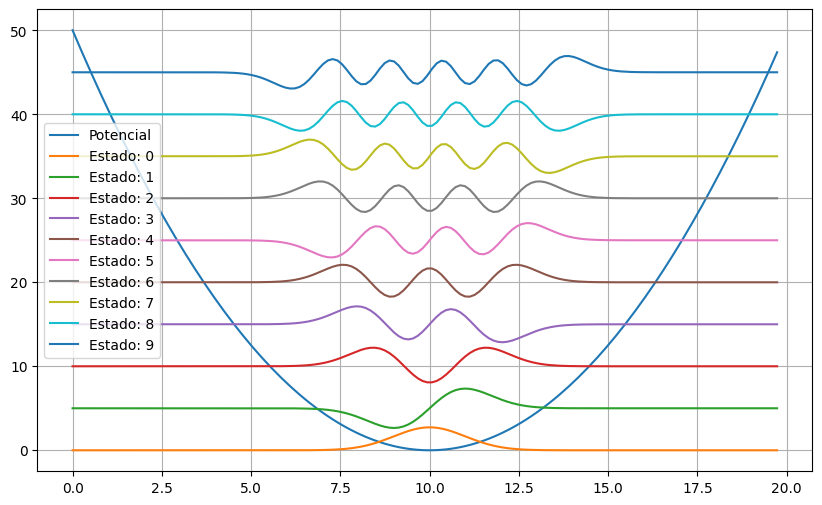

In [21]:
plt.figure(figsize=(10, 6))

V = potencial_oscilador_armonico(Rn)
plt.plot(Rn, V, label="Potencial")
for i in range(0, 10):
    plt.plot(Rn, - autovectores_osc[:,i]*10 + i*5, label=f"Estado: {i}")
plt.legend()
plt.grid()
plt.show()

Para la evolución temporal del oscilador armónico 

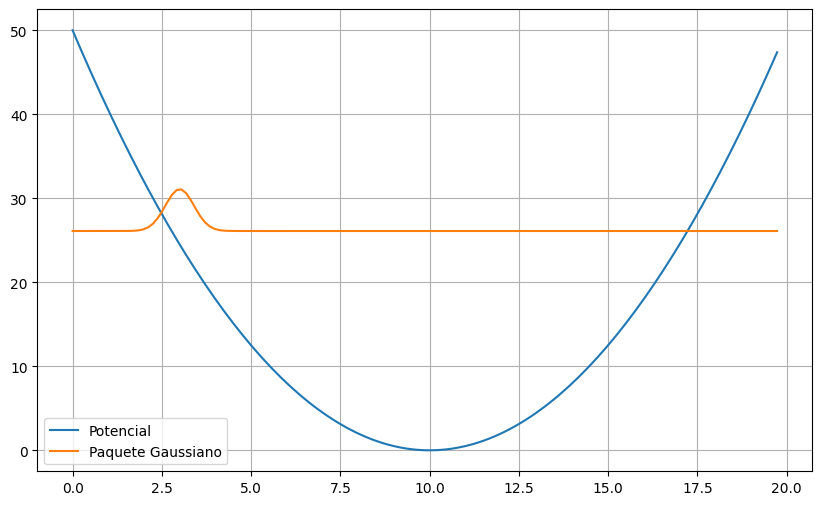

In [22]:
# Definición del paquete Gaussiano
def gauss(
        x,
        x0=3,
        sigma=0.4
):
    paquete = np.exp(- (x - x0)**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

    return paquete

x0 = 3
paquete_gaussiano = gauss(Rn, x0)

plt.figure(figsize=(10,6))
plt.plot(Rn, V, label="Potencial")
plt.plot(Rn, paquete_gaussiano * 5 + V[x0]-20, label="Paquete Gaussiano")
plt.legend()
plt.grid()
plt.show()

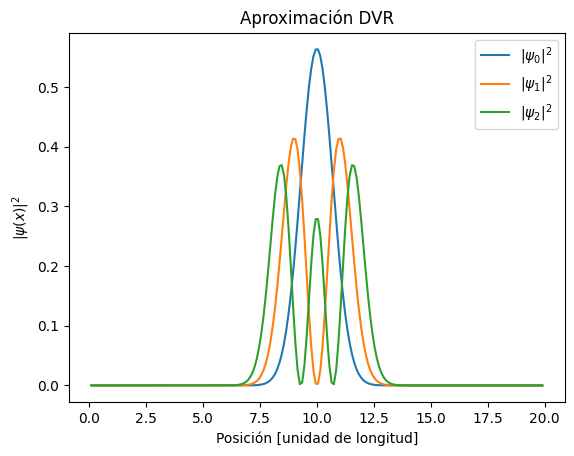


Energía del estado fundamental: 0.5000


In [23]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg

# Constantes Físicas
hbar = 1

# ============================================
# Funciones DVR (Discrete Variable Representation)
# ============================================

def calculate_Rn(n, R0, L, Nf):
    """
    Calcula la posición del n-ésimo punto de la grilla DVR.
    
    Parameters:
    n : int - índice del punto (desde 1 hasta Nf)
    R0 : float - posición inicial del dominio
    L : float - longitud del dominio
    Nf : int - número de puntos de la grilla
    """
    return n * L / (Nf + 1) + R0


def calculate_R_points(R0, Rm, Nf):
    """
    Calcula todos los puntos de la grilla DVR.
    
    Parameters:
    R0 : float - posición inicial
    Rm : float - posición final
    Nf : int - número de puntos
    
    Returns:
    list - lista de posiciones Rn
    """
    L = np.abs(Rm - R0)
    return [calculate_Rn(n, R0, L, Nf) for n in range(1, Nf + 1)]


def calculate_fn(n, R, R0, L, Nf):
    """
    Calcula la función de base DVR n-ésima evaluada en R.
    
    Parameters:
    n : int - índice de la función de base
    R : float - posición donde evaluar
    R0 : float - posición inicial del dominio
    L : float - longitud del dominio
    Nf : int - número de puntos de la grilla
    """
    ret = 2 / np.sqrt(2 * (Nf + 1))
    
    def aux_f(R, k):
        return np.sin(k * np.pi * (R - R0) / L) * np.sin(k * n * np.pi / (Nf + 1))
    
    ret *= sum([aux_f(R, k) for k in range(1, Nf + 1)])
    
    return ret


def calculate_S(i, j, L, Nf):
    """
    Calcula el elemento de matriz de energía cinética S(i,j).
    
    Parameters:
    i, j : int - índices de los puntos de la grilla
    L : float - longitud del dominio
    Nf : int - número de puntos de la grilla
    
    Returns:
    float - elemento de matriz S_ij
    """
    ret = -2 * np.pi**2 / ((Nf + 1) * L**2)
    
    def aux_f(k):
        return k**2 * np.sin(i * k * np.pi / (Nf + 1)) * np.sin(j * k * np.pi / (Nf + 1))
    
    ret *= sum([aux_f(k) for k in range(1, Nf + 1)])
    
    return ret


def build_hamiltonian(potential, m, R0, Rm, Nf):
    """
    Construye la matriz Hamiltoniana del sistema.
    
    Parameters:
    potential : function - función V(r) del potencial
    m : float - masa de la partícula
    R0 : float - posición inicial del dominio
    Rm : float - posición final del dominio
    Nf : int - número de puntos de la grilla
    
    Returns:
    hamiltonian : array - matriz Hamiltoniana (Nf x Nf)
    L : float - longitud del dominio
    R_points : list - puntos de la grilla
    """
    L = np.abs(Rm - R0)
    R_points = calculate_R_points(R0, Rm, Nf)
    
    def hamiltonian_elem(i, j):
        kinetic = -hbar**2 / (2 * m) * calculate_S(i, j, L, Nf)
        potential_term = int(i == j) * potential(calculate_Rn(i, R0, L, Nf))
        return kinetic + potential_term
    
    hamiltonian = np.zeros((Nf, Nf))
    for i in range(1, Nf + 1):
        for j in range(1, Nf + 1):
            iHj = hamiltonian_elem(i, j)
            hamiltonian[i - 1][j - 1] = hamiltonian[j - 1][i - 1] = iHj
    
    return hamiltonian, L, R_points


def solve_quantum_system(potential, m, R0, Rm, Nf):
    """
    Resuelve el sistema cuántico completo.
    
    Parameters:
    potential : function - función V(r) del potencial
    m : float - masa de la partícula
    R0 : float - posición inicial del dominio
    Rm : float - posición final del dominio
    Nf : int - número de puntos de la grilla
    
    Returns:
    eigenvalues : array - energías de los estados
    eigenkets : array - autovectores (funciones de onda)
    R_points : list - puntos de la grilla
    L : float - longitud del dominio
    """
    hamiltonian, L, R_points = build_hamiltonian(potential, m, R0, Rm, Nf)
    
    autovalores, autovectores = linalg.eigh(hamiltonian, UPLO='L')
    
    return autovalores, autovectores, R_points, L, Nf


def get_energy(autovalores, n):
    """
    Obtiene la energía del estado n.
    
    Parameters:
    eigenvalues : array - arreglo de autovalores
    n : int - índice del estado
    
    Returns:
    float - energía del estado n
    """
    return autovalores[n]


def get_autovectores(autovectores, n, L, Nf):
    """
    Obtiene el autovector normalizado del estado n.
    
    Parameters:
    eigenkets : array - matriz de autovectores
    n : int - índice del estado
    L : float - longitud del dominio
    Nf : int - número de puntos
    
    Returns:
    array - autovector normalizado
    """
    return np.sqrt((Nf + 1) / L) * autovectores[:, n]


# ============================================
# Funciones de salida y visualización
# ============================================

def print_energies(autovalores, N, E_exact=None):
    """
    Imprime las N primeras energías.
    
    Parameters:
    eigenvalues : array - arreglo de energías calculadas
    N : int - número de energías a mostrar
    E_exact : function (optional) - función que retorna la energía exacta E(n)
    """
    if E_exact is None:
        print("------ Aproximación")
        for i in range(N):
            aprox_E = get_energy(autovalores, i)
            print("E({:3d}) {:9.3f}".format(i, aprox_E))
    else:
        print("------ Valor Exacto - Aproximación - Error Relativo")
        for i in range(N):
            exact_E = E_exact(i)
            aprox_E = get_energy(autovalores, i)
            rel_error_E = 100 * np.abs(exact_E - aprox_E) / exact_E
            print("E({:3d}) {:9.3f} {:14.3f} {:12.2f}%".format(i, exact_E, aprox_E, rel_error_E))


def plot_autovectores(autovectores, R_points, L, Nf, N):
    """
    Grafica la densidad de probabilidad de los primeros N estados.
    
    Parameters:
    eigenkets : array - matriz de autovectores
    R_points : list - puntos de la grilla
    L : float - longitud del dominio
    Nf : int - número de puntos
    N : int - número de estados a graficar
    """
    fig, ax = plt.subplots(1)
    ax.set_title("Aproximación DVR")
    
    x = R_points
    
    for n in range(N):
        y = get_autovectores(autovectores, n, L, Nf)
        ax.plot(x, np.abs(y)**2, label=r'$|\psi_{%i}|^{2}$' % n)
    
    ax.legend()
    ax.set_ylabel(r'$|\psi(x)|^{2}$')
    ax.set_xlabel(r'Posición [unidad de longitud]')
    
    plt.show()


# ============================================
# Ejemplo de uso
# ============================================

if __name__ == "__main__":
    
    # Parámetros del sistema
    m = 1  # masa
    R0 = 0  # posición inicial
    Rm = 20   # posición final
    Nf = 200 # número de puntos

    # Definir un potencial (ejemplo: oscilador armónico)
    def harmonic_potential(x, k=1):
        return 0.5 * k * (x - np.abs(Rm - R0)/2)**2
    
    # Resolver el sistema
    autovalores, autovectores, R_points, L, Nf = solve_quantum_system(
        potential=harmonic_potential,
        m=m,
        R0=R0,
        Rm=Rm,
        Nf=Nf
    )
    
    # Mostrar las 5 primeras energías
    # Para oscilador armónico: E_n = (n + 1/2) * hbar * omega, con omega = sqrt(k/m)
    def exact_energy(n, k=1, m=1):
        omega = np.sqrt(k / m)
        return (n + 0.5) * hbar * omega
    
    #print_energies(autovalores, 5, E_exact=exact_energy)
    
    # Graficar los 3 primeros estados
    plot_autovectores(autovectores, R_points, L, Nf, 3)
    
    # Acceder a valores individuales
    E0 = get_energy(autovalores, 0)
    psi0 = get_autovectores(autovectores, 0, L, Nf)
    
    print(f"\nEnergía del estado fundamental: {E0:.4f}")

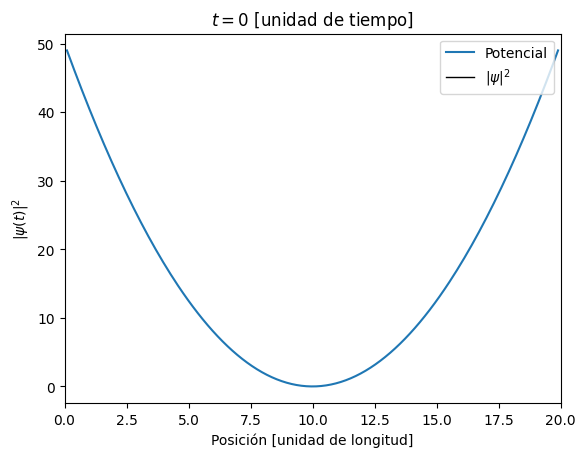

In [24]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Constante física
hbar = 1

# ============================================
# Funciones de Dinámica Cuántica
# ============================================

def calculate_Cn(n, psi0, eigenket_n, R_points, L, Nf):
    """
    Calcula el coeficiente C_n de la expansión en autoestados.
    
    Parameters:
    n : int - índice del autoestado
    psi0 : function - función de onda inicial ψ(x, t=0)
    eigenket_n : array - autoestado n-ésimo
    R_points : list - puntos de la grilla DVR
    L : float - longitud del dominio
    Nf : int - número de puntos
    
    Returns:
    complex - coeficiente C_n
    """
    ret = np.sqrt(L / (Nf + 1))
    ret *= sum([psi0(R_points[i]) * eigenket_n[i] for i in range(Nf)])
    
    return ret


def calculate_all_Cn(psi0, eigenkets, R_points, L, Nf):
    """
    Calcula todos los coeficientes C_n.
    
    Parameters:
    psi0 : function - función de onda inicial
    eigenkets : array - matriz de autoestados
    R_points : list - puntos de la grilla
    L : float - longitud del dominio
    Nf : int - número de puntos
    
    Returns:
    list - lista de coeficientes C_n
    """
    C_points = []
    for n in range(Nf):
        eigenket_n = get_autovectores(eigenkets, n, L, Nf)
        Cn = calculate_Cn(n, psi0, eigenket_n, R_points, L, Nf)
        C_points.append(Cn)
    
    return C_points


def calculate_Un(n, t, energy_n, t0):
    """
    Calcula el factor de evolución temporal U_n(t).
    
    Parameters:
    n : int - índice del estado
    t : float - tiempo
    energy_n : float - energía del estado n
    t0 : float - tiempo inicial
    
    Returns:
    complex - factor de fase exp(-i E_n (t-t0) / hbar)
    """
    return np.exp(-1j * energy_n * (t - t0) / hbar)


def calculate_psi_t(t, C_points, eigenkets, eigenvalues, L, Nf, t0):
    """
    Calcula la función de onda ψ(x, t) en el tiempo t.
    
    Parameters:
    t : float - tiempo
    C_points : list - coeficientes de expansión C_n
    eigenkets : array - matriz de autoestados
    eigenvalues : array - energías de los estados
    L : float - longitud del dominio
    Nf : int - número de puntos
    t0 : float - tiempo inicial
    
    Returns:
    array - función de onda ψ(x, t)
    """
    ret = np.sqrt(L / (Nf + 1))
    
    psi_sum = np.zeros(Nf, dtype=complex)
    
    for i in range(Nf - 1, -1, -1):
        eigenket_i = get_autovectores(eigenkets, i, L, Nf)
        energy_i = get_energy(eigenvalues, i)
        Un_i = calculate_Un(i, t, energy_i, t0)
        
        psi_sum += C_points[i] * eigenket_i * Un_i
    
    ret *= psi_sum
    
    return ret


def initialize_dynamics(psi0, eigenvalues, eigenkets, R_points, L, Nf, 
                       x0=0, t0=0, p0=0):
    """
    Inicializa la dinámica cuántica calculando los coeficientes C_n.
    
    Parameters:
    psi0 : function - función de onda inicial ψ(x, t=0)
    eigenvalues : array - energías de los estados
    eigenkets : array - matriz de autoestados
    R_points : list - puntos de la grilla
    L : float - longitud del dominio
    Nf : int - número de puntos
    x0 : float - posición inicial (default: 0)
    t0 : float - tiempo inicial (default: 0)
    p0 : float - momento inicial (default: 0)
    
    Returns:
    dict - diccionario con parámetros de la dinámica
    """
    C_points = calculate_all_Cn(psi0, eigenkets, R_points, L, Nf)
    
    dynamics_params = {
        'x0': x0,
        't0': t0,
        'p0': p0,
        'psi0': psi0,
        'C_points': C_points,
        'eigenvalues': eigenvalues,
        'eigenkets': eigenkets,
        'R_points': R_points,
        'L': L,
        'Nf': Nf
    }
    
    return dynamics_params


# ============================================
# Función de Animación
# ============================================

def plot_animation(dynamics_params, potential, m, frames=1000, zoom=2, dt=0.01):
    """
    Crea una animación de la evolución temporal de la función de onda.
    
    Parameters:
    dynamics_params : dict - diccionario con parámetros de la dinámica
    potential : function - función del potencial V(x)
    m : float - masa de la partícula
    frames : int - número de frames de la animación (default: 1000)
    zoom : float - rango vertical de visualización (default: 2)
    dt : float - paso temporal entre frames (default: 0.01)
    
    Returns:
    animation - objeto de animación de matplotlib
    """
    # Extraer parámetros
    x0 = dynamics_params['x0']
    t0 = dynamics_params['t0']
    p0 = dynamics_params['p0']
    C_points = dynamics_params['C_points']
    eigenvalues = dynamics_params['eigenvalues']
    eigenkets = dynamics_params['eigenkets']
    R_points = dynamics_params['R_points']
    L = dynamics_params['L']
    Nf = dynamics_params['Nf']
    
    # Calcular energía inicial
    #E0 = p0**2 / (2 * m) + potential(x0)
    #E0 = eigenvalues[2]
    
    # Convertir R_points a array numpy
    x = np.array(R_points)
    
    # Crear figura
    fig, ax = plt.subplots(1)
    
    # Graficar el potencial
    ax.plot(x, list(map(potential, x)), label=r'Potencial')
    
    # Inicializar líneas
    #line1, = ax.plot([], [], label=r'$\Re\{\psi\}$')
    #line2, = ax.plot([], [], label=r'$\Im\{\psi\}$')
    line3, = ax.plot([], [], label=r'$|\psi|^{2}$', color='k', linewidth=1.0)
    
    # Configurar ejes
    ax.set_xlim(0, L)
    #ax.set_ylim(E0 - zoom, E0 + zoom)
    
    ax.set_title(r'$t = 0$ [unidad de tiempo]')
    ax.set_xlabel("Posición [unidad de longitud]")
    ax.set_ylabel(r'$|\psi(t)|^{2}$')
    
    ax.legend(loc="upper right")
    
    def animate(frame_num):
        """
        Función que actualiza cada frame de la animación.
        """
        t = frame_num * dt
        
        # Actualizar título con el tiempo
        ax.set_title(r'$t = %.2f$ [unidad de tiempo]' % t)
        
        # Calcular función de onda en tiempo t
        y = calculate_psi_t(
            t= t, 
            C_points= C_points, 
            eigenkets= eigenkets, 
            eigenvalues= eigenvalues, 
            L= L, 
            Nf= Nf, 
            t0= t0
        )
        
        # Actualizar líneas
        #line1.set_data((x, np.real(y) + E0))
        #line2.set_data((x, np.imag(y) + E0))
        line3.set_data((x, np.abs(y)**2 + E0))
        
        return line3 #line1, line2, line3
    
    # Crear animación
    anim = animation.FuncAnimation(
        fig, 
        animate, 
        frames=frames, 
        interval=50, 
        repeat=True, 
        repeat_delay=1
    )
    
    return anim


# ============================================
# Ejemplo de uso completo
# ============================================

if __name__ == "__main__":
    # Parámetros del sistema
    m = 1
    R0 = 0
    Rm = 20
    Nf = 200

    # Definir un potencial (ejemplo: oscilador armónico)
    def harmonic_potential(x, k=1):
        return 0.5 * k * (x - np.abs(Rm - R0)/2)**2
    
    # Resolver el sistema estacionario
    autovalores, autovectores, R_points, L, Nf = solve_quantum_system(
        potential=harmonic_potential,
        m=m,
        R0=R0,
        Rm=Rm,
        Nf=Nf
    )
    
    # Definir función de onda inicial (paquete gaussiano)
    def gauss(
        x,
        x0=3,
        sigma=0.4
    ):
        paquete = np.exp(- (x - x0)**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

        return paquete 
    
    # def gaussian_wave_packet(x, x0=0, sigma=0.5, k0=0):
    #     """Paquete gaussiano con momento inicial k0"""
    #     return (1 / (sigma * np.sqrt(2 * np.pi)))**0.5 * \
    #            np.exp(-(x - x0)**2 / (4 * sigma**2)) * \
    #            np.exp(1j * k0 * x)
    
    # Parámetros iniciales
    x0 = 0      # posición inicial
    p0 = 0      # momento inicial
    t0 = 0      # tiempo inicial
    
    # Función de onda inicial específica
    def psi0(x):
        #fun = gaussian_wave_packet(x, x0=x0, sigma=0.5, k0=p0)
        fun = gauss(x)
        return fun

    # Inicializar dinámica
    dynamics_params = initialize_dynamics(
        psi0=psi0,
        eigenvalues=autovalores,
        eigenkets=autovectores,
        R_points=R_points,
        L=L,
        Nf=Nf,
        x0=x0,
        t0=t0,
        p0=p0
    )
    
    # Crear animación
    anim = plot_animation(
        dynamics_params=dynamics_params,
        potential=harmonic_potential,
        m=m,
        frames=200,
        zoom=0,
        dt=0.05
    )
    
    plt.show()
    
    # Guardar la animación:
    anim.save('potencial_armonico.gif', writer='pillow', fps=20)

# 4.

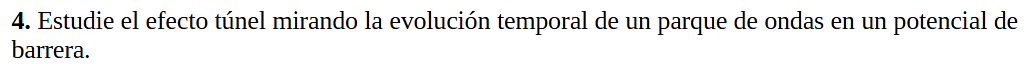

Visualizando el potencial...


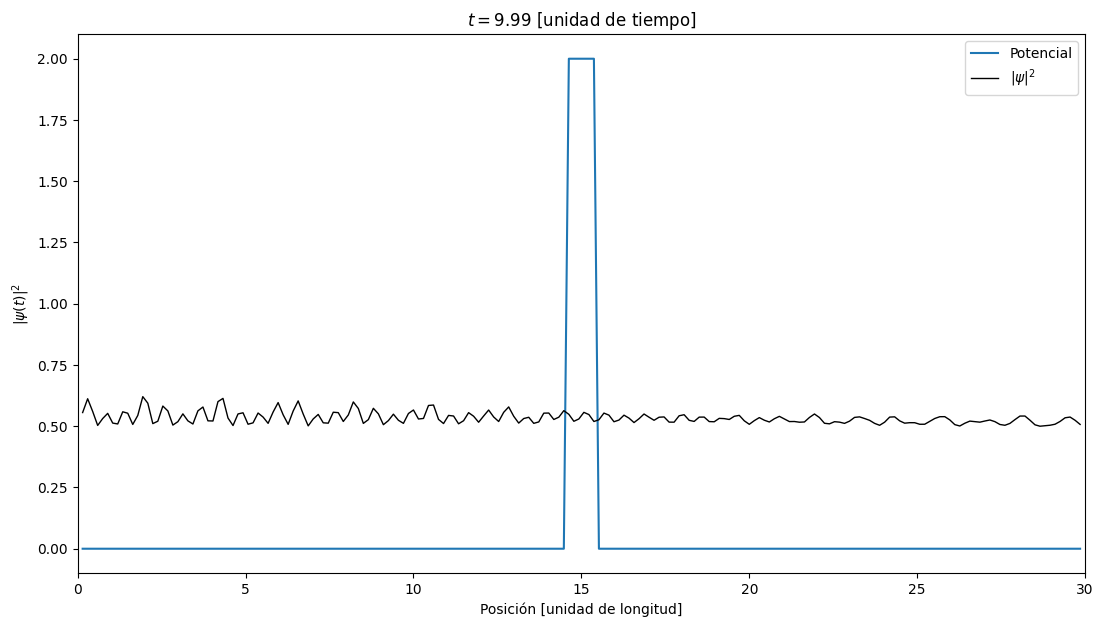

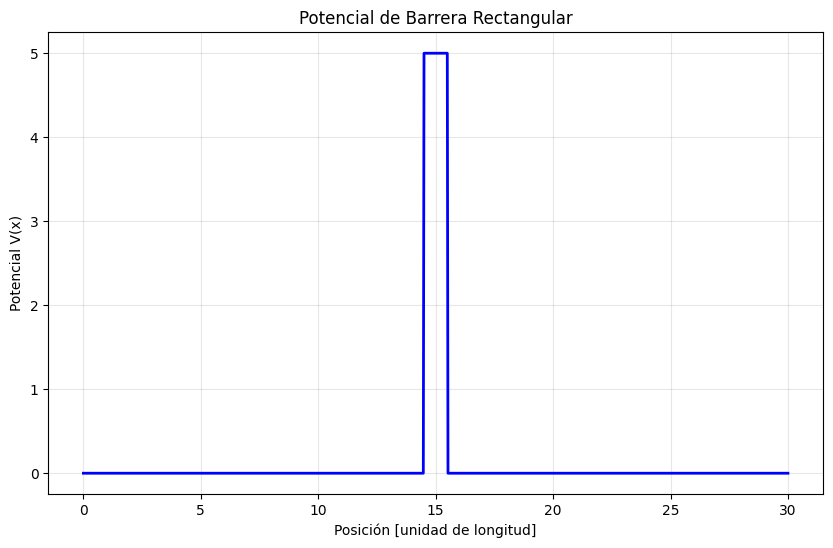


Resolviendo el sistema cuántico...

Sistema resuelto con éxito!
Altura de la barrera: V0 = 5
Ancho de la barrera: 1
Centro de la barrera: 15.0
Energía del estado fundamental: 0.0222
Dominio: [0, 30]
Número de puntos: 200

--- Primeras 10 energías ---
------ Aproximación
E(  0)     0.022
E(  1)     0.022
E(  2)     0.089
E(  3)     0.090
E(  4)     0.200
E(  5)     0.202
E(  6)     0.355
E(  7)     0.359
E(  8)     0.554
E(  9)     0.560

Graficando densidades de probabilidad...


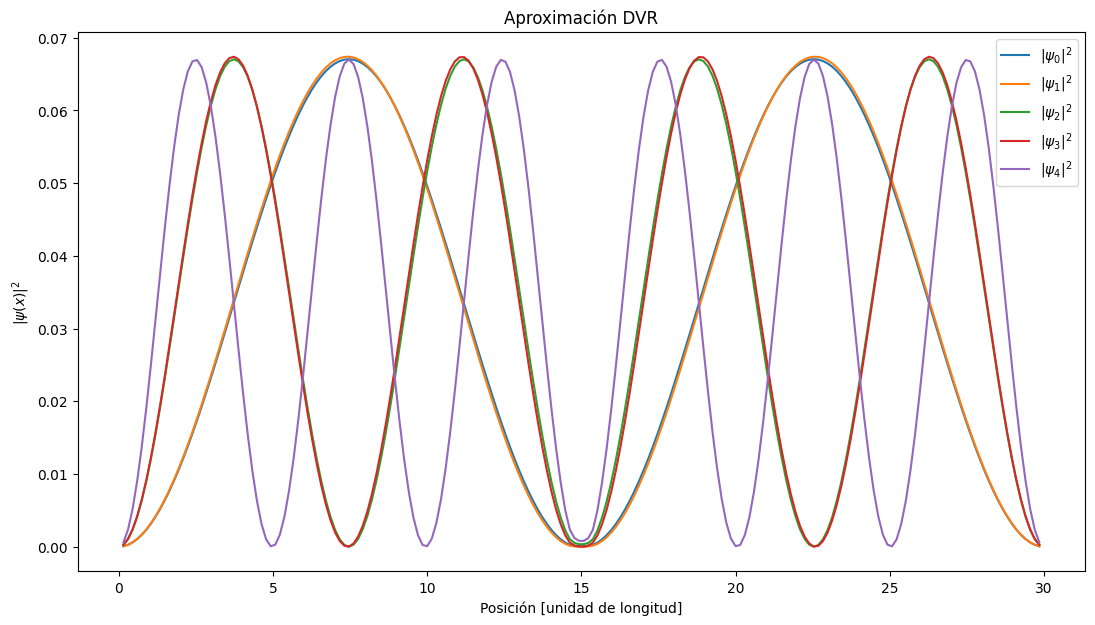


Graficando estados con potencial...


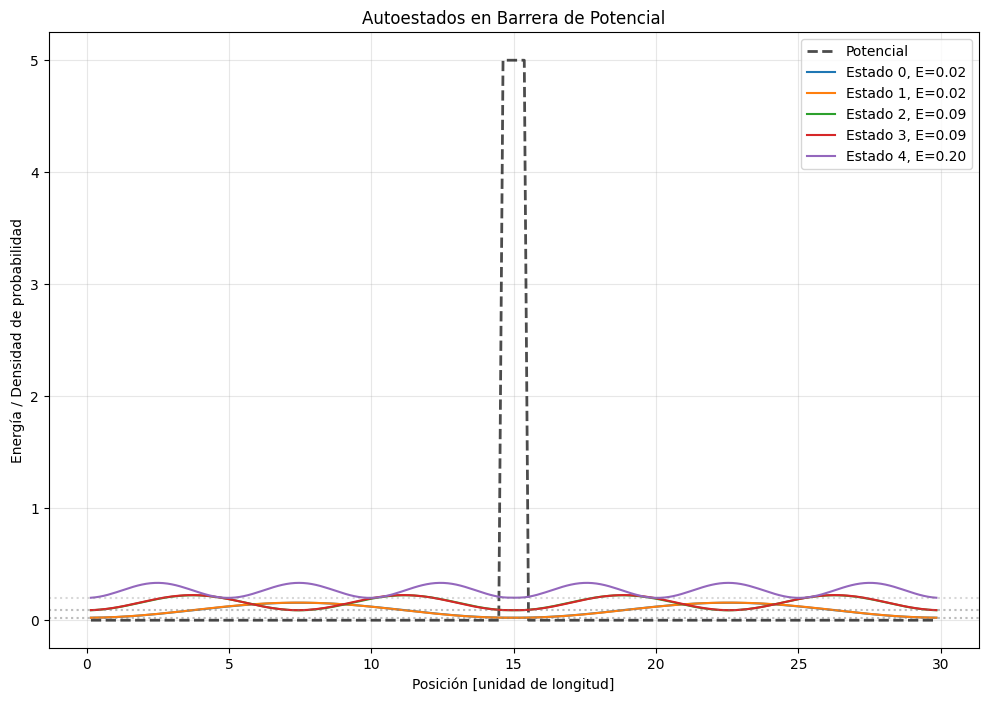


Estados ligados (E < V0): 29
Estados de dispersión (E ≥ V0): 171


In [32]:
import functools as ft
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# Funciones para crear potenciales
# ============================================

def rectangular_barrier(x, center, width, V0):
    """
    Potencial de barrera rectangular.
    
    Parameters:
    x : float - posición
    center : float - centro de la barrera
    width : float - ancho de la barrera
    V0 : float - altura de la barrera
    
    Returns:
    float - valor del potencial en x
    """
    if center - width/2 < x < center + width/2:
        return V0
    return 0


def create_barrier_potential(center, width, V0):
    """
    Crea una función de potencial de barrera con parámetros fijos.
    
    Parameters:
    center : float - centro de la barrera
    width : float - ancho de la barrera
    V0 : float - altura de la barrera
    
    Returns:
    function - función V(x) del potencial
    """
    return ft.partial(rectangular_barrier, center=center, width=width, V0=V0)


def plot_potential(potential, R0, Rm, num_points=1000):
    """
    Grafica el potencial V(x).
    
    Parameters:
    potential : function - función del potencial
    R0 : float - límite inferior
    Rm : float - límite superior
    num_points : int - número de puntos para graficar
    """
    x = np.linspace(R0, Rm, num_points)
    y = [potential(xi) for xi in x]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', linewidth=2)
    plt.xlabel('Posición [unidad de longitud]')
    plt.ylabel('Potencial V(x)')
    plt.title('Potencial de Barrera Rectangular')
    plt.grid(True, alpha=0.3)
    plt.show()


def plot_states_with_potential(eigenkets, eigenvalues, R_points, L, Nf, 
                                potential, N=5, offset_scale=1.0):
    """
    Grafica los autoestados junto con el potencial.
    
    Parameters:
    eigenkets : array - matriz de autoestados
    eigenvalues : array - energías
    R_points : list - puntos de la grilla
    L : float - longitud del dominio
    Nf : int - número de puntos
    potential : function - función del potencial
    N : int - número de estados a graficar
    offset_scale : float - escala para visualización
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    x = np.array(R_points)
    
    # Graficar el potencial
    V_values = [potential(xi) for xi in x]
    ax.plot(x, V_values, 'k--', linewidth=2, label='Potencial', alpha=0.7)
    
    # Graficar los autoestados
    for n in range(N):
        psi_n = get_autovectores(eigenkets, n, L, Nf)
        E_n = get_energy(eigenvalues, n)
        
        # Escalar y desplazar para visualización
        psi_scaled = offset_scale * np.abs(psi_n)**2 + E_n
        
        ax.plot(x, psi_scaled, label=f'Estado {n}, E={E_n:.2f}')
        ax.axhline(y=E_n, color='gray', linestyle=':', alpha=0.3)
    
    ax.set_xlabel('Posición [unidad de longitud]')
    ax.set_ylabel('Energía / Densidad de probabilidad')
    ax.set_title('Autoestados en Barrera de Potencial')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.show()


# ============================================
# PROGRAMA PRINCIPAL
# ============================================

if __name__ == "__main__":
    
    # Parámetros físicos
    m = 1       # masa de la partícula
    V0 = 5     # altura de la barrera
    width = 1   # ancho de la barrera
    
    # Parámetros de la simulación
    R0 = 0      # posición inicial
    Rm = 30     # posición final
    L = np.abs(Rm - R0)
    Nf = 200    # número de puntos DVR
    
    # Crear el potencial de barrera centrado en L/2
    center = L / 2
    V = create_barrier_potential(center=center, width=width, V0=V0)
    
    # Visualizar el potencial
    print("Visualizando el potencial...")
    plot_potential(V, R0, Rm)
    
    # Resolver el sistema cuántico
    print("\nResolviendo el sistema cuántico...")
    eigenvalues, eigenkets, R_points, L_result, Nf_result = solve_quantum_system(
        potential=V,
        m=m,
        R0=R0,
        Rm=Rm,
        Nf=Nf
    )
    
    # Mostrar información del sistema
    print("\nSistema resuelto con éxito!")
    print(f"Altura de la barrera: V0 = {V0}")
    print(f"Ancho de la barrera: {width}")
    print(f"Centro de la barrera: {center}")
    print(f"Energía del estado fundamental: {get_energy(eigenvalues, 0):.4f}")
    print(f"Dominio: [{R0}, {Rm}]")
    print(f"Número de puntos: {Nf}")
    
    # Mostrar las primeras 10 energías
    print("\n--- Primeras 10 energías ---")
    print_energies(eigenvalues, 10)
    
    # Graficar densidades de probabilidad
    print("\nGraficando densidades de probabilidad...")
    plot_autovectores(eigenkets, R_points, L_result, Nf_result, 5)
    
    # Graficar estados con el potencial
    print("\nGraficando estados con potencial...")
    plot_states_with_potential(
        eigenkets, eigenvalues, R_points, L_result, Nf_result,
        potential=V, N=5, offset_scale=2.0
    )
    
    # Análisis adicional: contar estados por debajo y por encima de la barrera
    states_below = sum(1 for E in eigenvalues if E < V0)
    states_above = sum(1 for E in eigenvalues if E >= V0)
    
    print(f"\nEstados ligados (E < V0): {states_below}")
    print(f"Estados de dispersión (E ≥ V0): {states_above}")

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import HTML

# ============================================
# Configuración de matplotlib
# ============================================

def setup_matplotlib(figsize=(13, 7), ffmpeg_path='/usr/bin/ffmpeg'):
    """
    Configura los parámetros de matplotlib para animaciones.
    
    Parameters:
    figsize : tuple - tamaño de la figura (ancho, alto)
    ffmpeg_path : str - ruta al ejecutable de ffmpeg
    """
    plt.ioff()
    plt.rcParams["figure.figsize"] = figsize
    plt.rcParams['animation.ffmpeg_path'] = ffmpeg_path


def create_gaussian_packet(x0, p0, sigma, hbar=1):
    """
    Crea una función de onda gaussiana con momento inicial.
    
    Parameters:
    x0 : float - posición inicial del centro del paquete
    p0 : float - momento inicial
    sigma : float - ancho del paquete gaussiano
    hbar : float - constante de Planck reducida
    
    Returns:
    function - función de onda inicial ψ₀(x)
    """
    def psi0(x):
        normalization = 1 / ((np.pi * sigma**2)**(1/4))
        gaussian = np.exp(-(x - x0)**2 / (2 * sigma**2))
        phase = np.exp(1j / hbar * p0 * x)
        return normalization * gaussian * phase
    
    return psi0


def display_animation(anim, format='html5', close_after=True):
    """
    Muestra una animación en un notebook de Jupyter.
    
    Parameters:
    anim : animation - objeto de animación de matplotlib
    format : str - formato de salida ('html5' o 'jshtml')
    close_after : bool - si cerrar la figura después de mostrar
    
    Returns:
    IPython.display.HTML - objeto HTML para mostrar
    """
    if format == 'html5':
        video =HTML(anim.to_jshtml())
    elif format == 'jshtml':
        video = anim.to_jshtml()
    else:
        raise ValueError("format debe ser 'html5' o 'jshtml'")
    
    html = display.HTML(video)
    display.display(html)
    
    if close_after:
        plt.close()
    
    return html

# ============================================
# PROGRAMA PRINCIPAL
# ============================================

if __name__ == "__main__":
    
    # Constante física
    hbar = 1
    
    # Configurar matplotlib
    setup_matplotlib(figsize=(13, 7), ffmpeg_path='/usr/bin/ffmpeg')
    
    # Parámetros de la dinámica
    t0 = 0                      # tiempo inicial
    x0 = 5                      # posición inicial del paquete
    p0 = np.sqrt(20) - 0.1     # momento inicial
    sigma = 0.6                 # ancho del paquete gaussiano
    
    # Crear función de onda inicial
    psi0 = create_gaussian_packet(x0=x0, p0=p0, sigma=sigma, hbar=hbar)
    
    # Calcular energía inicial esperada
    E_kinetic = p0**2 / (2 * m)
    E_potential = V(x0)
    E_total = E_kinetic + E_potential
    
    print("=== Parámetros de la simulación ===")
    print(f"Posición inicial: x0 = {x0}")
    print(f"Momento inicial: p0 = {p0:.4f}")
    print(f"Ancho del paquete: σ = {sigma}")
    print(f"Energía cinética inicial: {E_kinetic:.4f}")
    print(f"Energía potencial inicial: {E_potential:.4f}")
    print(f"Energía total inicial: {E_total:.4f}")
    print(f"Altura de la barrera: V0 = {V0}")
    
    # Verificar si el paquete tiene suficiente energía para atravesar la barrera
    if E_total > V0:
        print("\n✓ El paquete tiene energía suficiente para atravesar la barrera")
    else:
        print("\n✗ El paquete NO tiene energía suficiente (será reflejado)")
    
    # Inicializar la dinámica
    print("\nInicializando dinámica cuántica...")
    dynamics_params = initialize_dynamics(
        psi0=psi0,
        eigenvalues=eigenvalues,
        eigenkets=eigenkets,
        R_points=R_points,
        L=L_result,
        Nf=Nf_result,
        x0=x0,
        t0=t0,
        p0=p0
    )
    
    # Crear la animación
    print("Creando animación...")
    anim = plot_animation(
        dynamics_params=dynamics_params,
        potential=V,
        m=m,
        frames=1000,
        zoom=2,
        dt=0.01
    )
    
    anim.save('potencial_barrera.gif', writer='pillow', fps=20)

=== Parámetros de la simulación ===
Posición inicial: x0 = 5
Momento inicial: p0 = 4.3721
Ancho del paquete: σ = 0.6
Energía cinética inicial: 9.5578
Energía potencial inicial: 0.0000
Energía total inicial: 9.5578
Altura de la barrera: V0 = 5

✓ El paquete tiene energía suficiente para atravesar la barrera

Inicializando dinámica cuántica...
Creando animación...
